# Time Series Analysis

#### Daphka Alius
#### April 15, 2019

The Standard and Poor's 500 Index, commonly known as the S&P 500, is an American Stock Market index based on the market capitalization of the 500 largest publicly traded companies in the US (Investopedia). The common stocks of the Index are traded on the NYSE, NASDAQ, and the Cboe BZX Exchange. The breakdown of the index by sector is extremely diverse with majority of the values in Information Technology, Communication Services, Health and extends to many more.(Dow Jones) The 10 largest companies with highest weights are Apple, Amazon, Berkshire Hathaway, Facebook, Alphabet, and more.


Info regarding weighing if necessary can be found on [investopedia.com](https://www.investopedia.com/terms/s/sp500.asp)

The US economy has been volatile since the beginning of its historical record with periods of contractions  and expansions that marked themselves in history as great depressions or recessions or booms that later turn into bursting bubbles. Nonetheless, a key component of the US economy is its stock market. The US stock market is the largest of its kind in the world. Politicians have come to refer to it interchangeably with the US economy. While there are many components of trade and commerce that contribute to either the expansion or the contraction of the US economy, the stock market does contribute and can speculate on the state of the economy. Using the S&P 500 as an instrument, I will examined the trends and patterns of the stock market in order to predict future performances that. Consequently, the result might provide insights into the future of our economy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkplot
import thinkstats2
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
path = "/Users/daphka/Desktop/^GSPC.csv"

## Loading Data

We will read the CSV file into a Pandas DataFrame and convert the Date column into a datetime object.

In [3]:
SP500 = pd.read_csv(path, parse_dates =[0], index_col=0)

The columns of the data set are:
+ **Date:** The date in the format (yyyy-mm-dd)
+ **Open:** The price of a stock at opening
+ **High:** Highest recorded trading price of the day
+ **Low:** Lowest recorded trading price of the day
+ **Adj Close:** Amended closing price of the day
+ **Volume:** Number of stocks traded on this day

In [4]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-01-01,740.739990,794.669983,729.549988,786.159973,786.159973,11635830000
1997-02-01,786.159973,817.679993,773.429993,790.820007,790.820007,9715930000
1997-03-01,790.820007,814.900024,756.130005,757.119995,757.119995,10120760000
1997-04-01,757.119995,804.130005,733.539978,801.340027,801.340027,10454880000
1997-05-01,801.340027,851.869995,793.210022,848.280029,848.280029,10106650000


In [5]:
SP500.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,2477.100098,2490.870117,2417.350098,2471.649902,2471.649902,70616030000
2017-09-01,2474.419922,2519.439941,2446.550049,2519.360107,2519.360107,66337980000
2017-10-01,2521.199951,2582.979980,2520.399902,2575.260010,2575.260010,70871570000
2017-11-01,2583.209961,2657.739990,2557.449951,2584.840088,2584.840088,95142800000
2017-12-01,2645.100098,2694.969971,2605.520020,2673.610107,2673.610107,65251190000


In [6]:
SP500.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,252.0,1.382099e+03,4.204321e+02,7.295700e+02,1.106387e+03,1.281685e+03,1.500100e+03,2.645100e+03
High,252.0,1.425901e+03,4.213055e+02,7.946700e+02,1.138875e+03,1.317045e+03,1.539195e+03,2.694970e+03
Low,252.0,1.335735e+03,4.207280e+02,6.667900e+02,1.069557e+03,1.248250e+03,1.443030e+03,2.605520e+03
Close,252.0,1.389074e+03,4.248590e+02,7.350900e+02,1.106170e+03,1.282770e+03,1.506182e+03,2.673610e+03
Adj Close,252.0,1.389074e+03,4.248590e+02,7.350900e+02,1.106170e+03,1.282770e+03,1.506182e+03,2.673610e+03
Volume,252.0,5.667980e+10,3.299014e+10,9.715930e+09,2.658090e+10,6.119653e+10,7.970272e+10,1.618436e+11


Question: The stock market is not open every day. Therefore, there are missing dates. Would those be considered missing data that I would need to represent as such?

In [7]:
sns.set(rc={'figure.figsize':(11, 4)})


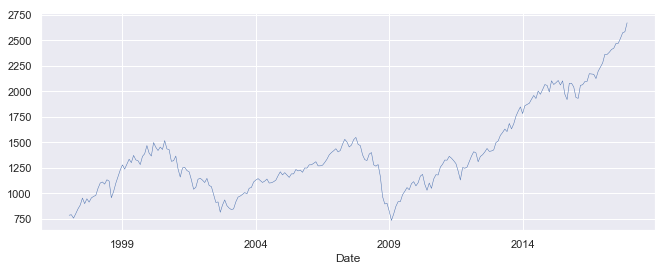

In [8]:
SP500["Adj Close"].plot(linewidth=0.5);


**Trend:** The Adjusted Closing Price seems to have been increasing over the past 70 years. However, we can use a rolling mean to smoothen out this pattern. A rolling mean is a statistical tool used to smoothen short-term fluctuations in our data set in order to highlight long-term trends.

In [17]:
#What's the difference between sm vs smf?
prices = SP500["Adj Close"]
rollingMean5 = prices.rolling(24).mean() #1255 = 251*5 for every five year window
rollingStd5 = prices.rolling(24).std()

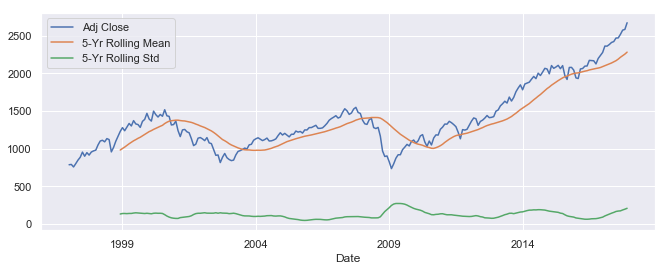

In [18]:
prices.plot()
rollingMean5.plot(label = "5-Yr Rolling Mean")
rollingStd5.plot(label = "5-Yr Rolling Std")
plt.legend()
plt.show()

As is depicted by the orange curve, we can see the upward trend that confirms the increasing pattern of the S&P500 Index with a window of five years. Additionally, the rolling standard deviation of a five year window also shows increase in standard deviation which signals more volatility of stock prices.

In [14]:
prices.head()

Date
1950-01-03    16.66
1950-01-04    16.85
1950-01-05    16.93
1950-01-06    16.98
1950-01-09    17.08
Name: Adj Close, dtype: float64

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decomposition = seasonal_decompose(prices, model="additive", freq=1)

In [ ]:
decomposition.

In [12]:
highs = SP500["High"]
lows = SP500["Low"]

0          16.660000
1          16.850000
2          16.930000
3          16.980000
4          17.080000
5          17.030001
6          17.090000
7          16.760000
8          16.670000
9          16.719999
10         16.860001
11         16.850000
12         16.870001
13         16.900000
14         16.920000
15         16.860001
16         16.740000
17         16.730000
18         16.820000
19         17.020000
20         17.049999
21         17.049999
22         17.230000
23         17.290001
24         17.320000
25         17.230000
26         17.209999
27         17.280001
28         17.240000
29         17.059999
            ...     
17389    2748.189941
17390    2761.850098
17391    2757.899902
17392    2775.659912
17393    2787.330078
17394    2789.879883
17395    2781.580078
17396    2794.199951
17397    2813.489990
17398    2803.120117
17399    2795.760010
17400    2793.729980
17401    2808.020020
17402    2816.879883
17403    2796.439941
17404    2790.270020
17405    2767

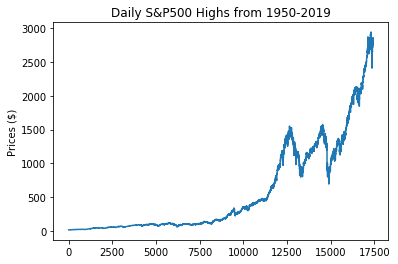

In [17]:
plt.plot(highs)
plt.ylabel("Prices ($)")
plt.title("Daily S&P500 Highs from 1950-2019")
plt.show()

(array([9830., 1717.,  595., 1583., 1933.,  408.,  419.,  415.,  224.,
         295.]), array([  16.66     ,  309.0849912,  601.5099824,  893.9349736,
        1186.3599648, 1478.784956 , 1771.2099472, 2063.6349384,
        2356.0599296, 2648.4849208, 2940.909912 ]), <a list of 10 Patch objects>)

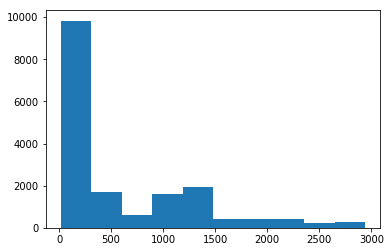

In [18]:
plt.hist(highs)

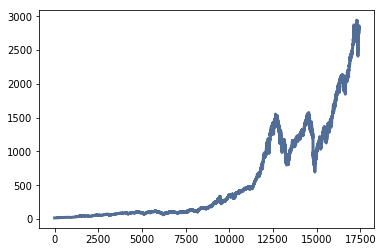

In [13]:
thinkplot.plot(highs)

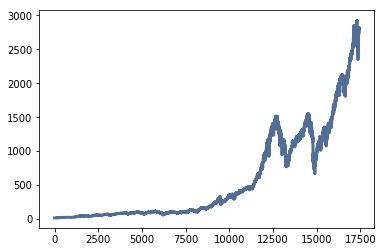

In [14]:
thinkplot.plot(lows)

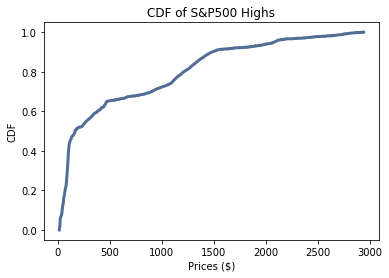

In [17]:
high_cdf = thinkstats2.Cdf(highs)
thinkplot.Cdf(high_cdf)
thinkplot.Config(title = "CDF of S&P500 Highs", ylabel = "CDF",
                xlabel="Prices ($)")